# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

___
### 1. Importar a Base de dados

In [79]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")
display(tabela)

tabela.info()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


___
### 2. Novas bibliotecas e Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

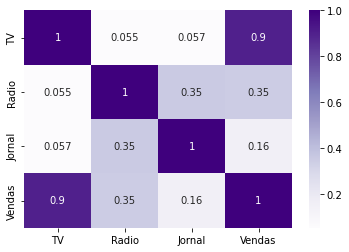

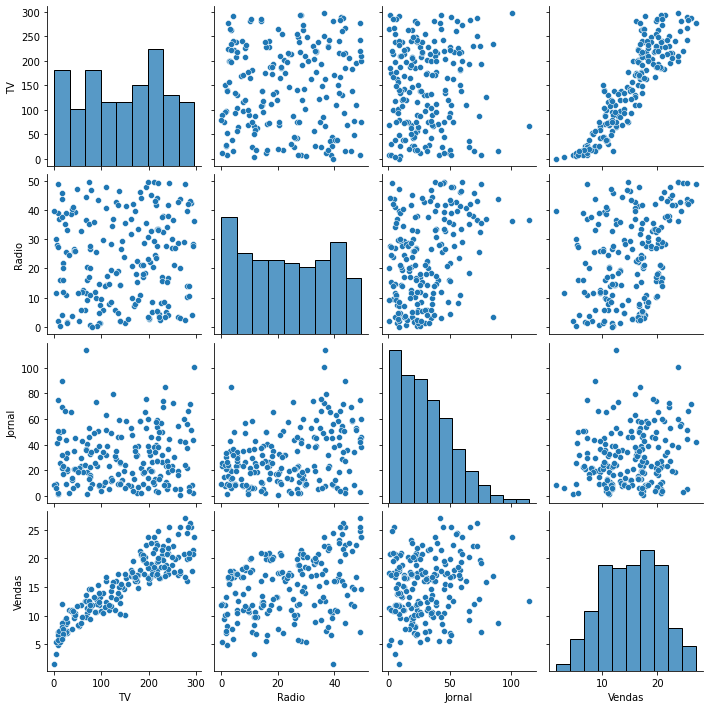

In [80]:
import matplotlib.pyplot as plt      # Meu amado PLT
import seaborn as sns                # Extensão do PLT para gráficos

# Mapa de calor da correlação entre os valores da tabela
sns.heatmap(tabela.corr(), annot=True, cmap="Purples")
plt.show()
    # É possível detectar que TV tem a maior correlação com o valor das 
    # vendas (90%), seguido do Rádio (35%) e jornal contribuindo apenas (16%)

    
# Gráfico de dispersão para cada combinação de colunas
sns.pairplot(tabela)
plt.show()
    # Dá pra ver claramente a correlação maior entre TV e vendas também

___
### 3. Modelo estatístico - Treino e teste de IA

- Separando em dados de treino e dados de teste

In [81]:
from sklearn.model_selection import train_test_split
# Método de treino/teste do modelo estatístico, parte do conjunto scikit-learn

x = tabela[["TV", "Radio", "Jornal"]] #Entradas para o modelo
y = tabela["Vendas"]                  #Resultados para o modelo

# Treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [82]:
from sklearn.linear_model import LinearRegression  
from sklearn.ensemble import RandomForestRegressor 

# Salvar e treinar os modelos
modelo_regLin = LinearRegression()         # Regressão linear
modelo_arvDec = RandomForestRegressor()    # Árvore de Decisão

modelo_regLin.fit(x_treino, y_treino)
modelo_arvDec.fit(x_treino, y_treino)

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [83]:
from sklearn.metrics import r2_score

# Testar os modelos "treinados"
    # predict(): Usando os valores de teste X, faz o modelo prever o Y teste
    # r² compara a previsão do modelo com o Y real.
    # Você então compara os coeficientes para decidir qual modelo é melhor
    
previsao_regLin = modelo_regLin.predict(x_teste)
previsao_arvDec = modelo_arvDec.predict(x_teste)

r2_regLin = r2_score(y_teste, previsao_regLin)
r2_arvDec = r2_score(y_teste, previsao_arvDec)

print(f"R² Regressão Linear  = {r2_regLin*100:.4f}%")
print(f"R² Árvore de Decisão = {r2_arvDec*100:.4f}%")

R² Regressão Linear  = 88.7789%
R² Árvore de Decisão = 94.7819%


___
### 4. Visualização Gráfica das Previsões

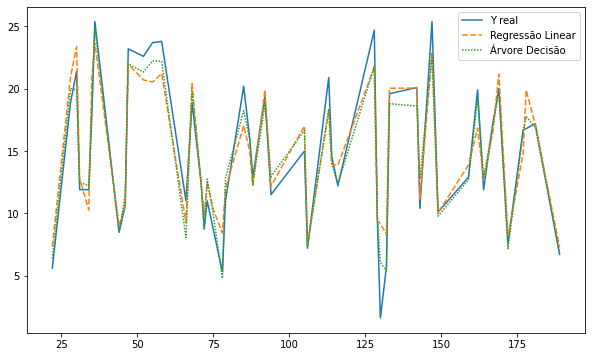

In [84]:
#1. Criar um dataframe com as colunas de Y:
    # Y teste ("ground truth")
    # Y previsto pela regressão linear
    # Y previsto pela árvore de decisão
    
#2. Plotar os 3 em um gráfico de linhas e comparar a precisão dos modelos

tabela_ys = pd.DataFrame()
tabela_ys["Y real"] = y_teste
tabela_ys["Regressão Linear"] = previsao_regLin
tabela_ys["Árvore Decisão"] = previsao_arvDec

plt.figure(figsize=(10,6))
sns.lineplot(data=tabela_ys)
plt.show()
    # Dá para ver que a árvDec. acompanha com mais precisão os valores reais

___
### 5. Como fazer uma nova previsão?

In [85]:
#1. Importar o novo conjunto de dados X (TV, rádio e Jornal)
#2. Usá-lo para prever outros valores de Y (vendas)
    # Adicionar as previsões em uma nova coluna do dataframe

novos_x = pd.read_csv("novos.csv")

novos_x["Previsão de Vendas (Milhões)"] = modelo_arvDec.predict(novos_x)
display(novos_x)

# Podemos concluir que um alto investimento em anúncios na TV e médio em
# rádio dão o maior retorno em vendas.

,TV,Radio,Jornal,Previsão de Vendas (Milhões)
0,23.1,3.8,69.2,7.678
1,44.5,0.0,5.1,8.210
2,170.2,45.9,0.0,19.807
